Mean Absolute Error (MAE): 150039.86
Mean Squared Error (MSE): 106729246066.40
Root Mean Squared Error (RMSE): 326694.42
R-squared (R²): 0.2573


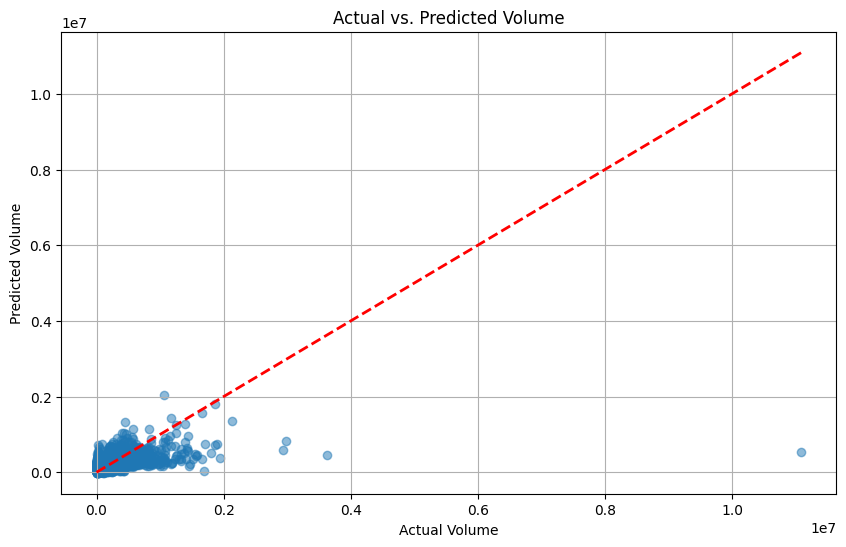

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# Import regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('Raw_data.csv')

# Drop Date (keep other columns as features for now)
# Consider if 'Adj Close' is redundant if 'Close' is present. Often it is.
# df = df.drop(['Date', 'Adj Close'], axis=1) # Example: dropping Adj Close too
df = df.drop(['Date'], axis=1)


# Define features (x) and target (y)
x = df.drop(columns=['Volume'])
y = df['Volume']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
# Define columns to scale
cols_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
# Use .loc to avoid SettingWithCopyWarning
x_train.loc[:, cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])

# Transform test data (using same scaler)
x_test.loc[:, cols_to_scale] = scaler.transform(x_test[cols_to_scale])


# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions (these will be floats)
y_pred = model.predict(x_test)

# --- Evaluate using REGRESSION metrics ---
# DO NOT convert y_test or y_pred to int here

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or use mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# --- Optional: Visualize predictions vs actuals ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # y=x line
plt.xlabel("Actual Volume")
plt.ylabel("Predicted Volume")
plt.title("Actual vs. Predicted Volume")
plt.grid(True)
plt.show()